In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
import pandas as pd
import sys
fpath = '/Users/LingxinW/Box/Wang/PythonStuff'
sys.path.append(fpath)
import heka_reader 

In [48]:
cd ~/Box/Wang/Ephys_recording/ALM_ephys/recordingfiles

C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\recordingfiles


In [27]:
myfile = heka_reader.Bundle ('191206.dat') # pick one specific recording file

In [28]:
#mydata = myfile.data[1,10,5,0] # data from group 2, series 11, trace number 5
#mydata2 = myfile.data[1,10,5,1] # mechanical stimulation data 
x = np.arange(len(myfile.data[1,10,5,0]))/5000
#y = mydata*1000000000000 # change MRC from A to pA


# extract data for stimulation
stim = []
for j in range (0,6):
    stim.append(myfile.data[1,10,j,1])
    
stim_swp = stim

# creat empty list of 1-6 sweeps and later put all three sweeps into this empty list
mrc_swps = []
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []
sw6 = []

# create a for loop to collect 1-6 sweeps in three series
for i in range (10,13):
    sw1.append(myfile.data[1,i,0,0]*1000000000000)
    sw2.append(myfile.data[1,i,1,0]*1000000000000)
    sw3.append(myfile.data[1,i,2,0]*1000000000000)
    sw4.append(myfile.data[1,i,3,0]*1000000000000)
    sw5.append(myfile.data[1,i,4,0]*1000000000000)
    sw6.append(myfile.data[1,i,5,0]*1000000000000)
   
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3
sw6_mean = (sw6[0]+sw6[1]+sw6[2])/3

mrc_swps.append(sw1_mean)
mrc_swps.append(sw2_mean)
mrc_swps.append(sw3_mean)
mrc_swps.append(sw4_mean)
mrc_swps.append(sw5_mean)
mrc_swps.append(sw6_mean)
print (sw1_mean)

[-1.35572391 -1.73115515 -0.81343435 ... -1.06372184 -0.27114478
 -1.10543642]


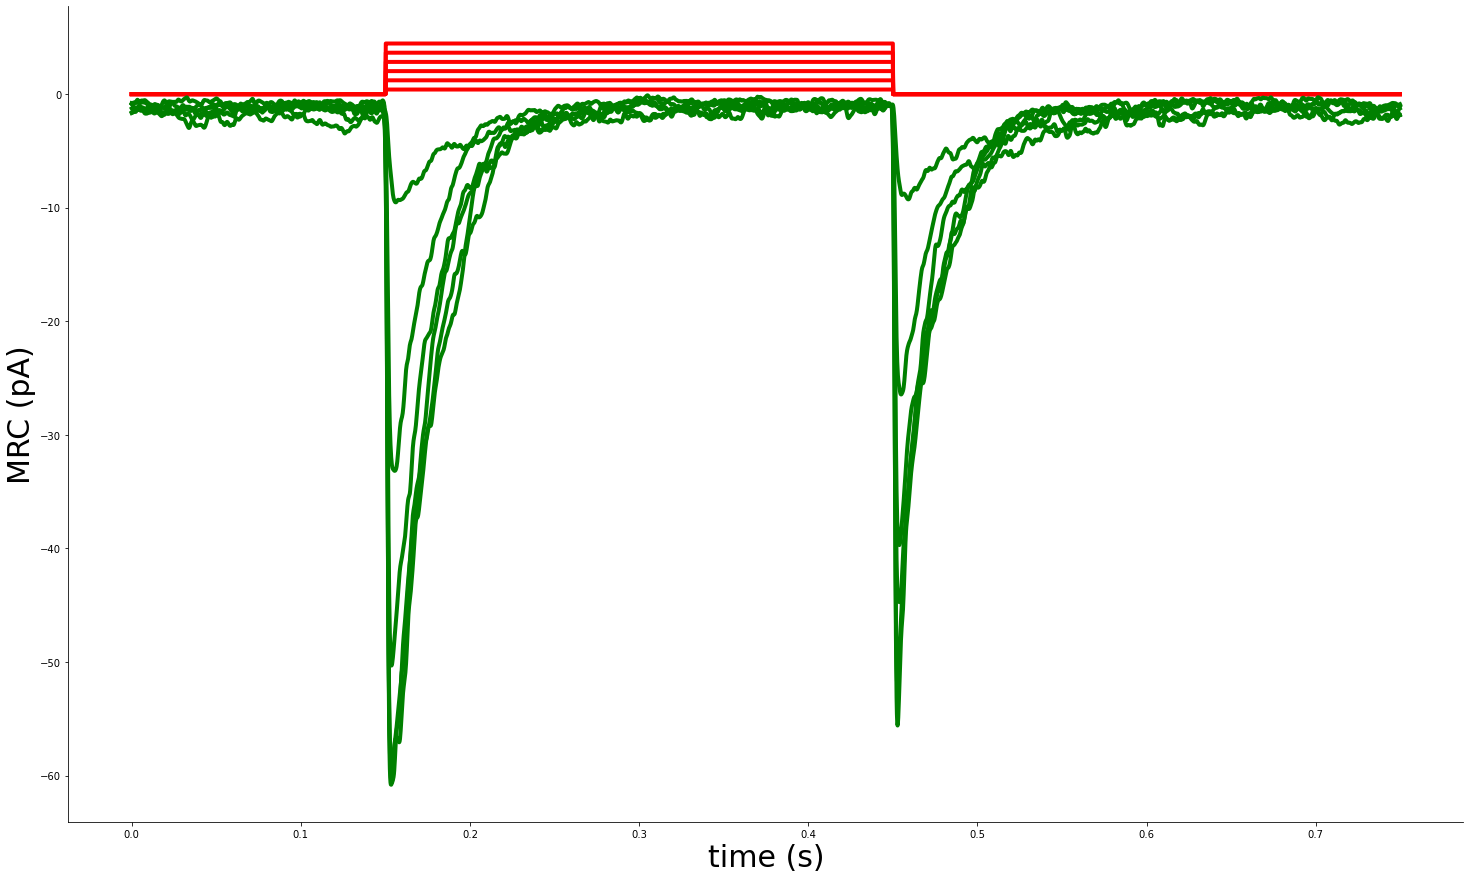

In [29]:
# here I am going to smooth the averaged sweeps one by one in a loop and plot them together



fig, ax = plt.subplots (figsize=(25,15)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)


#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x, stim_swp[0], 'r-', lw=4)
plt.plot (x, stim_swp[1], 'r-', lw=4)
plt.plot (x, stim_swp[2], 'r-', lw=4)
plt.plot (x, stim_swp[3], 'r-', lw=4)
plt.plot (x, stim_swp[4], 'r-', lw=4)
plt.plot (x, stim_swp[5], 'r-', lw=4)

plt.plot (x, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw5_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw6_mean, 3), 'g-', lw=4)


In [30]:
t_peaks_on = []
amp_peaks_on = []
t_peaks_off = []
amp_peaks_off =[]

# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (6):
    t_peaks_on.append(np.argmax(-gaussian_filter(mrc_swps[i][:1000],3))/5000)
    amp_peaks_on.append(gaussian_filter(mrc_swps[i],3)[np.argmax(-gaussian_filter(mrc_swps[i][:1000],3))])
    t_peaks_off.append((np.argmax(-gaussian_filter(mrc_swps[i][2000:3500],3))+2000)/5000)
    amp_peaks_off.append(gaussian_filter(mrc_swps[i],3)[np.argmax(-gaussian_filter(mrc_swps[i][2000:3500],3))+2000])
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])

print(t_peaks_on)
print(amp_peaks_on)
                        
print(t_peaks_off)
print(amp_peaks_off)

# save the lists to excel file

[0.156, 0.1554, 0.1536, 0.1538, 0.1534, 0.154]
[-9.531613108793943, -33.169189079998326, -50.31111364450518, -60.639006092949856, -60.803378715650354, -59.11677221575587]
[0.4592, 0.4548, 0.4538, 0.454, 0.4528, 0.4528]
[-9.267826741718245, -26.443507684279748, -39.70625331572596, -44.72959286264682, -52.291179804528056, -55.58968326732193]


In [31]:
# use the loops created from up section


t_start_act_on = []
t_start_act_off = []
#This for loop is to ...
for i in range (6):
    t_start_act_on.append(np.argmax(-np.diff(gaussian_filter(mrc_swps[i][:1000],3),2))/5000)
    
    t_start_act_off.append((np.argmax(-np.diff(gaussian_filter(mrc_swps[i][2200:3500],3),2))+2200)/5000)
   
    #t_start_act_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    


print (t_start_act_on)
print (t_start_act_off)

[0.1506, 0.1504, 0.1504, 0.1502, 0.1502, 0.1502]
[0.4502, 0.4502, 0.4502, 0.4502, 0.45, 0.4502]


In [32]:
# Now calculate the half-time to maximum current 

t_half_act_on = [] # MRC_on current half-time to maximum current
t_half_act_off = [] # MRC_off current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (6):
    t_half_act_on.append(((t_peaks_on [i] - t_start_act_on[i])/2)*1000)
    t_half_act_off.append(((t_peaks_off [i] - t_start_act_off[i])/2)*1000)
    
print (t_half_act_on)
print (t_half_act_off)

[2.699999999999994, 2.500000000000002, 1.5999999999999903, 1.799999999999996, 1.600000000000004, 1.899999999999999]
[4.5000000000000036, 2.2999999999999963, 1.799999999999996, 1.9000000000000128, 1.3999999999999846, 1.2999999999999956]


In [46]:
# time point of peak amplitude of on and off MRC will be used here
# do not forget to smooth the veraged traces first
# argmax() functions will read the whole list and find the fist point the satisfy the condition, or it will read through 
# a list and give the indice of the maximum value of a list

t_half_decay_on = []
t_half_decay_off = []

for i in range (6):
     t_half_decay_on.append ((((np.argmax(gaussian_filter(mrc_swps[i][770:1100],3) > (amp_peaks_on[i]*0.5))+770)*(1/5000)) - t_peaks_on[i])*1000)
       
     t_half_decay_off.append((((np.argmax(gaussian_filter(mrc_swps[i][2300:3500],3) > (amp_peaks_off[i]*0.5))+2300)*(1/5000)) - t_peaks_off[i])*1000)
    
print (t_half_decay_on)
print (t_half_decay_off)

[27.200000000000003, 16.999999999999986, 17.000000000000014, 18.20000000000002, 20.80000000000001, 21.400000000000002]
[33.600000000000016, 16.60000000000006, 17.60000000000006, 13.400000000000023, 12.400000000000022, 12.400000000000022]


In [69]:
EphysData = {'amp_peaks_on': amp_peaks_on, 't_peaks_on':t_peaks_on, 'amp_peaks_off': amp_peaks_off, 't_peaks_off':t_peaks_off,\
            't_start_act_on': t_start_act_on, 't_start_act_off': t_start_act_off, 't_half_act_on': t_half_act_on,\
            't_half_act_off': t_half_act_off, 't_half_decay_on': t_half_decay_on, 't_half_decay_off': t_half_decay_off}
EphysDataFrame = pd.DataFrame(EphysData)

EphysDataFrame

,amp_peaks_on,t_peaks_on,amp_peaks_off,t_peaks_off,t_start_act_on,t_start_act_off,t_half_act_on,t_half_act_off,t_half_decay_on,t_half_decay_off
0,-9.531613,0.1560,-9.267827,0.4592,0.1506,0.4502,2.7,4.5,27.2,33.6
1,-33.169189,0.1554,-26.443508,0.4548,0.1504,0.4502,2.5,2.3,17.0,16.6
2,-50.311114,0.1536,-39.706253,0.4538,0.1504,0.4502,1.6,1.8,17.0,17.6
3,-60.639006,0.1538,-44.729593,0.4540,0.1502,0.4502,1.8,1.9,18.2,13.4
4,-60.803379,0.1534,-52.291180,0.4528,0.1502,0.4500,1.6,1.4,20.8,12.4
5,-59.116772,0.1540,-55.589683,0.4528,0.1502,0.4502,1.9,1.3,21.4,12.4


In [72]:
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

wb = pd.ExcelWriter(dfpath +'ALM_Data.xlsx', engine='xlsxwriter')
EphysDataFrame.to_excel(wb, sheet_name='Analysis')

wb.save()

In [80]:
EphysDataFrame.iloc[0,0]

-9.531613108793943

In [81]:
EphysDataFrame.to_csv("ALM_Data.csv") # this will save the file directly to the filepath of the recording files